# Gradient boosting Optimization
In this model generation, gradient boosting from model 5 is optimized for kaggle score


In [2]:
%matplotlib inline
import os, glob
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from IPython.display import display
#from pyearth import Earth

In [273]:
train = pd.read_csv(os.path.join('..','competition_data','train_set.csv'),header=0)
test = pd.read_csv(os.path.join('..','competition_data','test_set.csv'),header=0)
tubedf = pd.read_csv(os.path.join('..','competition_data','tube.csv'),  header=0)
compdf = pd.read_csv(os.path.join('..','competition_data','components.csv'), header=0,index_col=0)
billdf = pd.read_csv(os.path.join('..','competition_data','bill_of_materials.csv'),header=0)

In [276]:
train_test = train.append(test,ignore_index=True)
train_testm1 = train_test.merge(tubedf,on='tube_assembly_id')
train_testm2 = train_testm1.merge(billdfm,on='tube_assembly_id')

In [ ]:
lbl_enc_comp_typeid1 = LabelEncoder()
lbl_enc_comp_typeid1.fit(train_testm2.component_type_id_1.values)  
lbl_enc_comp_typeid2 = LabelEncoder()
lbl_enc_comp_typeid2.fit(train_testm2.component_type_id_2.values)  
lbl_enc_comp_typeid3 = LabelEncoder()
lbl_enc_comp_typeid3.fit(train_testm2.component_type_id_3.values)
lbl_enc_comp_name1 = LabelEncoder()
lbl_enc_comp_name1.fit(train_testm2.component_name_1.values)  
lbl_enc_comp_name2 = LabelEncoder()
lbl_enc_comp_name2.fit(train_testm2.component_name_2.values)  
lbl_enc_comp_name3 = LabelEncoder()
lbl_enc_comp_name3.fit(train_testm2.component_name_3.values)

lbl_enc_mat_id = LableEncoder()
lbl_enc_mat_id.fit(train_testm2.material_id.values)  
lbl_enc_splr_id = LableEncoder()
lbl_enc_splr_id.fit(train_testm2.supplier.values)


#print lbl_enc.classes_
#comp_id1_trans = lbl_enc.transform(trainp.component_type_id_1.values)
#from collections import defaultdict
#d = defaultdict(int)
#for i in comp_id1_trans:
#    d[i] += 1
#print d

In [32]:
trainm1 = train.merge(tubedf,on='tube_assembly_id')

In [205]:
def replace_comp_id_x(inp_df, comp_df, col_index, id_no):
    """
    Replaces the component id with component name and component id type 
    in the input dataframe
    """
    column = inp_df.columns[col_index]
    name = []
    comp_typeid = []
    for comp_id in inp_df[column].values:
        if isinstance(comp_id,str):
            name.append(comp_df.loc[comp_id,'name'])
            comp_typeid.append(comp_df.component_type_id[comp_id])
        else:
            name.append(np.nan)
            comp_typeid.append(np.nan)
    name = np.array(name)
    comp_typeid = np.array(comp_typeid)
    out_df = inp_df.drop(column,axis=1)
    out_df.insert(col_index, 'component_id_name_'+str(id_no), name)
    out_df.insert(col_index+1,'component_type_id_'+str(id_no),comp_typeid)
    return out_df


In [206]:
billdfm = billdf.copy()
billdfm = replace_comp_id_x(billdfm, compdf, 1, 1)
billdfm = replace_comp_id_x(billdfm, compdf, 4, 2)
billdfm = replace_comp_id_x(billdfm, compdf, 7, 3)
billdfm = replace_comp_id_x(billdfm, compdf, 10, 4)
billdfm = replace_comp_id_x(billdfm, compdf, 13, 5)
billdfm = replace_comp_id_x(billdfm, compdf, 16, 6)
billdfm = replace_comp_id_x(billdfm, compdf, 19, 7)
billdfm = replace_comp_id_x(billdfm, compdf, 22, 8)

In [207]:
trainm2 = trainm1.merge(billdfm,on='tube_assembly_id')

In [208]:
def get_year_month_offset(date_ser, ref_date):
    dates = list(date_ser.values)
    dates_conv = map(pd.to_datetime,dates)
    years = [date.year for date in dates_conv]
    months = [date.month for date in dates_conv]
    ref_date_conv = pd.to_datetime(ref_date)
    days = [(date-ref_date_conv).days for date in dates_conv]
    return years, months, days
        

#for id1 in test_set.id:
#    qdate = pd.to_datetime(test_set.iloc[id1-1]['quote_date'])
#    year.append(qdate.year)
#    month.append(qdate.month)
#    ofsetdate.append( (qdate-pd.to_datetime('2010-12-31')).days)

In [209]:
years, months, ofsetdates = get_year_month_offset(trainm2.quote_date, '2010-12-31')
#out_df.insert(col_index, 'component_id_name_'+str(id_no), name)
#ears_ser = pd.Series(data=years,name='years')
#years_ser.value_counts()

In [210]:
print 'length of data', len(trainm2)
print 'Null vals in comp1', np.sum(trainm2.quantity_1.isnull().values)
print 'Null vals in comp2', np.sum(trainm2.quantity_2.isnull().values)
print 'Null vals in comp3', np.sum(trainm2.quantity_3.isnull().values)
print 'Null vals in comp4', np.sum(trainm2.quantity_4.isnull().values)
print 'Null vals in comp5', np.sum(trainm2.quantity_5.isnull().values)
print 'Null vals in comp6', np.sum(trainm2.quantity_6.isnull().values)
print 'Null vals in comp7', np.sum(trainm2.quantity_7.isnull().values)
print 'Null vals in comp8', np.sum(trainm2.quantity_8.isnull().values)

length of data 30213
Null vals in comp1 1462
Null vals in comp2 9129
Null vals in comp3 23042
Null vals in comp4 29426
Null vals in comp5 30147
Null vals in comp6 30185
Null vals in comp7 30205
Null vals in comp8 30210


In the predictor 'comp_id_x' related data where x = 4,5,6,7,8 is unncessary since the non null data is < 2.6%
In addition tube_assembly id is removed from now on.

In [212]:
trainp = trainm2.loc[:,[u'supplier', u'quote_date', u'annual_usage',
       u'min_order_quantity', u'bracket_pricing', u'quantity', 
       u'material_id', u'diameter', u'wall', u'length', u'num_bends',
       u'bend_radius', u'end_a_1x', u'end_a_2x', u'end_x_1x', u'end_x_2x',
       u'end_a', u'end_x', u'num_boss', u'num_bracket', u'other',
       u'component_id_name_1', u'component_type_id_1', u'quantity_1',
       u'component_id_name_2', u'component_type_id_2', u'quantity_2',
       u'component_id_name_3', u'component_type_id_3', u'quantity_3',
       'cost']]
trainp = trainp.drop('quote_date',axis=1)
trainp.insert(1, 'year', years)
trainp.insert(2, 'month', months)
trainp.insert(3, 'days', ofsetdates)

num_boss, num_brack and other have one or two high frequency values and then few low frequency values

## Categorical variables pruning
The categorical variables such as supplier_id, material_id, component_id_x_name, 
end_x, end_a with string categories are converted to integer
labels. The values with high frequencies are retained and the low
frequency values (<50) are all combined into a single value

In [41]:
print trainp.component_id_1_name.value_counts()[0:16]
print trainp.component_id_2_name.value_counts()[0:9]
print trainp.component_id_3_name.value_counts()[0:5]

NUT-SWIVEL         9364
NUT-FLARED         4774
CONNECTOR-SEAL     1131
NUT                1130
NUT-INV FLARED      758
SLEEVE-ORFS         174
CONNECTOR           159
FLANGE              135
HEAD-FLANGED         96
BOSS                 93
ELBOW                85
SLEEVE               85
SLEEVE-FITTING       79
FLANGE-ONE PIEC      66
ELBOW-90 DEG         62
ELBOW-FLARED         48
dtype: int64
SLEEVE-ORFS         8873
SLEEVE-FLARED        886
SLEEVE               860
NUT-SWIVEL           564
CONNECTOR-SEAL       322
ELBOW-90 DEG         149
SLEEVE-FACE SEAL     132
NUT                  109
NUT-FITTING           79
dtype: int64
CONNECTOR-SEAL    2727
SLEEVE-ORFS        445
ELBOW-90 DEG       271
CONNECTOR          144
SLEEVE-REDUCER      91
dtype: int64


In [37]:
print sum(trainp.component_id_1_name.isnull().values)
print sum(trainp.component_id_2_name.isnull().values)
print sum(trainp.component_id_3_name.isnull().values)

477
6321
14741


In [213]:
TRANSFORM_CUTOFF = 50

In [214]:
lbl_enc = LabelEncoder()
lbl_enc.fit(trainp.component_type_id_1.values)  
print lbl_enc.classes_
comp_id1_trans = lbl_enc.transform(trainp.component_type_id_1.values)
from collections import defaultdict
d = defaultdict(int)
for i in comp_id1_trans:
    d[i] += 1
print d

for i in range(len(comp_id1_trans)):
    if d[comp_id1_trans[i]] < TRANSFORM_CUTOFF:
        comp_id1_trans[i] = 0 

d1 = defaultdict(int)
for i in comp_id1_trans:
    d1[i] += 1

print d1
lbl1_map = {}
for i, lbl in enumerate(list(lbl_enc.classes_)):
    lbl1_map[lbl] = i

['CP-001' 'CP-002' 'CP-003' 'CP-004' 'CP-005' 'CP-006' 'CP-007' 'CP-008'
 'CP-009' 'CP-010' 'CP-011' 'CP-012' 'CP-014' 'CP-015' 'CP-018' 'CP-019'
 'CP-020' 'CP-022' 'CP-024' 'CP-025' 'CP-026' 'CP-027' 'CP-028' 'OTHER'
 'nan']
defaultdict(<type 'int'>, {0: 7, 1: 92, 2: 134, 3: 298, 4: 1, 5: 148, 6: 63, 7: 109, 8: 11, 9: 112, 10: 1, 11: 12, 12: 2170, 13: 186, 14: 335, 15: 3, 16: 4, 17: 11, 18: 1030, 19: 14156, 20: 3505, 21: 28, 22: 5274, 23: 1061, 24: 1462})
defaultdict(<type 'int'>, {0: 78, 1: 92, 2: 134, 3: 298, 5: 148, 6: 63, 7: 109, 9: 112, 12: 2170, 13: 186, 14: 335, 18: 1030, 19: 14156, 20: 3505, 22: 5274, 23: 1061, 24: 1462})


In [215]:
lbl_enc = LabelEncoder()
lbl_enc.fit(trainp.component_type_id_2.values)  
print lbl_enc.classes_
print trainp.component_type_id_2.value_counts()
#print list(lbl_enc.classes_).index('SLEEVE-ORFS')
comp_id2_trans = lbl_enc.transform(trainp.component_type_id_2.values)
from collections import defaultdict
d = defaultdict(int)
for i in comp_id2_trans:
    d[i] += 1
print d
for i in range(len(comp_id2_trans)):
    if d[comp_id2_trans[i]] < TRANSFORM_CUTOFF:
        comp_id2_trans[i] = 0 

d2 = defaultdict(int)
for i in comp_id2_trans:
    d2[i] += 1

print d2

lbl2_map = {}
for i, lbl in enumerate(list(lbl_enc.classes_)):
    lbl2_map[lbl] = i

['CP-001' 'CP-002' 'CP-003' 'CP-004' 'CP-006' 'CP-007' 'CP-008' 'CP-009'
 'CP-010' 'CP-011' 'CP-012' 'CP-014' 'CP-015' 'CP-016' 'CP-018' 'CP-019'
 'CP-020' 'CP-021' 'CP-022' 'CP-024' 'CP-025' 'CP-026' 'CP-027' 'CP-028'
 'OTHER' 'nan']
CP-024    17145
nan        9129
CP-025     1064
CP-014      769
OTHER       657
CP-026      638
CP-015      249
CP-018      109
CP-008       81
CP-002       79
CP-003       67
CP-006       58
CP-004       27
CP-028       24
CP-012       17
CP-016       16
CP-011       15
CP-027       14
CP-019       12
CP-001       11
CP-022        9
CP-009        8
CP-007        8
CP-010        4
CP-021        2
CP-020        1
dtype: int64
defaultdict(<type 'int'>, {0: 11, 1: 79, 2: 67, 3: 27, 4: 58, 5: 8, 6: 81, 7: 8, 8: 4, 9: 15, 10: 17, 11: 769, 12: 249, 13: 16, 14: 109, 15: 12, 16: 1, 17: 2, 18: 9, 19: 17145, 20: 1064, 21: 638, 22: 14, 23: 24, 24: 657, 25: 9129})
defaultdict(<type 'int'>, {0: 168, 1: 79, 2: 67, 4: 58, 6: 81, 11: 769, 12: 249, 14: 109, 19: 17145, 20:

In [216]:
lbl2_map

{'CP-001': 0,
 'CP-002': 1,
 'CP-003': 2,
 'CP-004': 3,
 'CP-006': 4,
 'CP-007': 5,
 'CP-008': 6,
 'CP-009': 7,
 'CP-010': 8,
 'CP-011': 9,
 'CP-012': 10,
 'CP-014': 11,
 'CP-015': 12,
 'CP-016': 13,
 'CP-018': 14,
 'CP-019': 15,
 'CP-020': 16,
 'CP-021': 17,
 'CP-022': 18,
 'CP-024': 19,
 'CP-025': 20,
 'CP-026': 21,
 'CP-027': 22,
 'CP-028': 23,
 'OTHER': 24,
 'nan': 25}

In [217]:
lbl_enc3 = LabelEncoder()
lbl_enc3.fit(trainp.component_type_id_3.values)  
print lbl_enc3.classes_
comp_id3_trans = lbl_enc3.transform(trainp.component_type_id_3.values)
from collections import defaultdict
d = defaultdict(int)
for i in comp_id3_trans:
    d[i] += 1
print d
for i in range(len(comp_id3_trans)):
    if d[comp_id3_trans[i]] < TRANSFORM_CUTOFF:
        comp_id3_trans[i] = 0 

d3 = defaultdict(int)
for i in comp_id3_trans:
    d3[i] += 1

print d3

lbl3_map = {}
for i, lbl in enumerate(list(lbl_enc3.classes_)):
    lbl3_map[lbl] = i

['CP-001' 'CP-002' 'CP-003' 'CP-004' 'CP-006' 'CP-007' 'CP-008' 'CP-009'
 'CP-010' 'CP-011' 'CP-012' 'CP-014' 'CP-015' 'CP-016' 'CP-017' 'CP-018'
 'CP-019' 'CP-020' 'CP-022' 'CP-023' 'CP-024' 'CP-025' 'CP-026' 'CP-027'
 'CP-028' 'OTHER' 'nan']
defaultdict(<type 'int'>, {0: 5, 1: 56, 2: 19, 3: 71, 4: 37, 5: 1, 6: 41, 7: 1, 8: 45, 9: 20, 10: 11, 11: 4732, 12: 562, 13: 21, 14: 4, 15: 190, 16: 12, 17: 1, 18: 22, 19: 6, 20: 893, 21: 97, 22: 19, 23: 4, 24: 1, 25: 284, 26: 23058})
defaultdict(<type 'int'>, {0: 270, 1: 56, 3: 71, 11: 4732, 12: 562, 15: 190, 20: 893, 21: 97, 25: 284, 26: 23058})


In [218]:
#comp_id1_trans = np.expand_dims(comp_id1_trans,axis=1)
#comp_id2_trans = np.expand_dims(comp_id2_trans,axis=1)
#comp_id3_trans = np.expand_dims(comp_id3_trans,axis=1)
#enc_comp_id1 = OneHotEncoder()
#enc_comp_id1.fit(  
#print enc_comp_id1.n_values_
#enc_end.feature_indices_
#end_trans = enc_end.transform(end_vals).toarray()
#np.shape(end_trans)

In [219]:
trainp.material_id.value_counts()

SP-0029    16165
SP-0035     5697
SP-0039     2852
SP-0019     2652
SP-0028     1654
SP-0037      397
SP-0038      139
SP-0033      102
SP-0046       87
SP-0048       54
SP-0008       50
SP-0036       48
SP-0041       43
SP-0030       22
SP-0034       16
SP-0032        4
SP-0031        2
dtype: int64

The first four material ids have high frequencies. Its better to assign those 4 to 
different values and group the rest into a single value

In [220]:
#material_id_map = {'SP-0029': 0, 'SP-0035': 1, 'SP-0039': 2,
#                   'SP-0019': 3, 'SP-0028': 5, 'SP-0036': 4,
#                   'SP-0046': 4, 'SP-0048': 4, 'SP-0033': 4,
#                   'SP-0030': 4, 'SP-0038': 4, 'SP-0031': 4, 
#                   'SP-0037': 4, 
#                  }
#trainp1 = trainp.copy()
#for key,value in material_id_map.items():
#    trainp1.material_id[trainp1.material_id==key] = value
#trainp1.material_id[trainp1.material_id.isnull()] = 4

lbl_enc_matid = LabelEncoder()
lbl_enc_matid.fit(trainp.material_id.values)  
print lbl_enc_matid.classes_
matid_trans = lbl_enc_matid.transform(trainp.material_id.values)
from collections import defaultdict
d = defaultdict(int)
for i in matid_trans:
    d[i] += 1
print d
for i in range(len(matid_trans)):
    if d[matid_trans[i]] < TRANSFORM_CUTOFF:
        matid_trans[i] = 6 

d_matid = defaultdict(int)
for i in matid_trans:
    d_matid[i] += 1

print d_matid

matid_map = {}
for i, lbl in enumerate(list(lbl_enc_matid.classes_)):
    matid_map[lbl] = i
print matid_map

[nan 'SP-0008' 'SP-0019' 'SP-0028' 'SP-0029' 'SP-0030' 'SP-0031' 'SP-0032'
 'SP-0033' 'SP-0034' 'SP-0035' 'SP-0036' 'SP-0037' 'SP-0038' 'SP-0039'
 'SP-0041' 'SP-0046' 'SP-0048']
defaultdict(<type 'int'>, {0: 229, 1: 50, 2: 2652, 3: 1654, 4: 16165, 5: 22, 6: 2, 7: 4, 8: 102, 9: 16, 10: 5697, 11: 48, 12: 397, 13: 139, 14: 2852, 15: 43, 16: 87, 17: 54})
defaultdict(<type 'int'>, {0: 229, 1: 50, 2: 2652, 3: 1654, 4: 16165, 6: 135, 8: 102, 10: 5697, 12: 397, 13: 139, 14: 2852, 16: 87, 17: 54})
{nan: 0, 'SP-0046': 16, 'SP-0041': 15, 'SP-0033': 8, 'SP-0048': 17, 'SP-0034': 9, 'SP-0035': 10, 'SP-0036': 11, 'SP-0037': 12, 'SP-0030': 5, 'SP-0031': 6, 'SP-0032': 7, 'SP-0019': 2, 'SP-0008': 1, 'SP-0038': 13, 'SP-0039': 14, 'SP-0029': 4, 'SP-0028': 3}


In [221]:
lbl_enc_splr = LabelEncoder()
lbl_enc_splr.fit(trainp.supplier.values)  
print lbl_enc_splr.classes_
splr_trans = lbl_enc_splr.transform(trainp.supplier.values)
from collections import defaultdict
d = defaultdict(int)
for i in splr_trans:
    d[i] += 1
print d
for i in range(len(splr_trans)):
    if d[splr_trans[i]] < TRANSFORM_CUTOFF:
        splr_trans[i] = 0 

d_splr = defaultdict(int)
for i in splr_trans:
    d_splr[i] += 1

print d_splr

splr_map = {}
for i, lbl in enumerate(list(lbl_enc_splr.classes_)):
    splr_map[lbl] = i
print splr_map

['S-0003' 'S-0004' 'S-0005' 'S-0006' 'S-0007' 'S-0008' 'S-0009' 'S-0011'
 'S-0012' 'S-0013' 'S-0014' 'S-0015' 'S-0018' 'S-0022' 'S-0023' 'S-0024'
 'S-0025' 'S-0026' 'S-0027' 'S-0029' 'S-0030' 'S-0031' 'S-0041' 'S-0042'
 'S-0043' 'S-0046' 'S-0050' 'S-0051' 'S-0054' 'S-0056' 'S-0058' 'S-0059'
 'S-0060' 'S-0061' 'S-0062' 'S-0064' 'S-0066' 'S-0068' 'S-0070' 'S-0072'
 'S-0074' 'S-0078' 'S-0080' 'S-0081' 'S-0087' 'S-0090' 'S-0092' 'S-0095'
 'S-0096' 'S-0097' 'S-0104' 'S-0105' 'S-0106' 'S-0107' 'S-0108' 'S-0109'
 'S-0111']
defaultdict(<type 'int'>, {0: 1, 1: 1, 2: 24, 3: 1, 4: 5, 5: 7, 6: 4, 7: 5, 8: 1, 9: 554, 10: 139, 11: 5, 12: 10, 13: 1, 14: 4, 15: 1, 16: 3, 17: 727, 18: 20, 19: 1, 20: 111, 21: 21, 22: 3323, 23: 19, 24: 14, 25: 2, 26: 5, 27: 1, 28: 838, 29: 9, 30: 516, 31: 4, 32: 3, 33: 2, 34: 264, 35: 446, 36: 20553, 37: 1, 38: 18, 39: 2317, 40: 5, 41: 2, 42: 10, 43: 64, 44: 2, 45: 3, 46: 10, 47: 1, 48: 2, 49: 3, 50: 90, 51: 33, 52: 1, 53: 2, 54: 1, 55: 1, 56: 2})
defaultdict(<type 'int'

In [222]:
#material_id_vals = trainp.material_id.values
#preprocessing.OneHotEncoder
#material_id_vals = np.reshape(matid_trans,(len(matid_trans),1))
#material_id_vals

In [223]:
#enc = OneHotEncoder()
#enc.fit(material_id_vals)  
#enc.n_values_
#enc.feature_indices_
#mat_id_trans = enc.transform(material_id_vals).toarray()
#mat_id_trans

In [224]:
end_keys = set(trainp.end_a.unique()) | set(trainp.end_x.unique())
end_map = {}
i = 0
for key in end_keys:
    end_map[key] = i
    i += 1
end_map

{'9999': 0,
 'EF-001': 5,
 'EF-002': 6,
 'EF-003': 7,
 'EF-004': 1,
 'EF-005': 2,
 'EF-006': 3,
 'EF-007': 4,
 'EF-008': 8,
 'EF-009': 9,
 'EF-010': 19,
 'EF-011': 18,
 'EF-012': 17,
 'EF-013': 16,
 'EF-014': 23,
 'EF-015': 22,
 'EF-016': 21,
 'EF-017': 20,
 'EF-018': 25,
 'EF-019': 24,
 'EF-020': 12,
 'EF-021': 13,
 'EF-022': 10,
 'EF-023': 11,
 'EF-025': 14,
 'NONE': 15}

In [225]:
#end_map = {'EF-003': 0, 'EF-008': 1, 'EF-018': 2, 'NONE': 4, 
#           'EF-017': 5, 'EF-009': 6, 'EF-023': 7, 'EF-012': 3, 
#           'EF-013': 3, 'EF-021': 3, 'EF-016':  3, 'EF-006': 3, 
#           'EF-002': 3, 'EF-010': 3, 'EF-019': 3, 'EF-022': 3,
#           'EF-007': 3, 'EF-004': 3, 'EF-015': 3, 'EF-005': 3,
#           'EF-014': 3, 'EF-001': 3, 'EF-025': 3, '9999': 3,
#           'EF-024': 3, 'EF-026': 3, 'EF-011': 3}

In [226]:
#trainp2 = trainp.copy()
#for key,value in end_map.items():
#    trainp2.end_a[trainp2.end_a==key] = value
#    trainp2.end_x[trainp2.end_x==key] = value
#trainp2.end_a[trainp2.end_a.isnull()] = 15
#trainp2.end_x[trainp2.end_x.isnull()] = 15
#end_a_vals = trainp2.end_a.values
#preprocessing.OneHotEncoder
#end_a_vals = np.reshape(end_a_vals,(len(end_a_vals),1))
#end_x_vals = trainp2.end_x.values
#end_x_vals = np.reshape(end_x_vals,(len(end_x_vals),1))


In [227]:
end_a_vals = [end_map[x] for x in trainp.end_a.values]
end_x_vals = [end_map[x] for x in trainp.end_x.values]

d_a = defaultdict(int)
d_x = defaultdict(int)
for val in end_a_vals:
    d_a[val] += 1
for val in end_x_vals:
    d_x[val] += 1

end_a_vals = [x if d_a[x] > TRANSFORM_CUTOFF else 1 for x in end_a_vals]
end_x_vals = [x if d_x[x] > TRANSFORM_CUTOFF else 1 for x in end_x_vals]
    

In [228]:
end_x_1x_vals = [1 if x=='Y' else 0 for x in trainp.end_x_1x.values]
end_a_1x_vals = [1 if x=='Y' else 0 for x in trainp.end_a_1x.values]
end_x_2x_vals = [1 if x=='Y' else 0 for x in trainp.end_x_2x.values]
end_a_2x_vals = [1 if x=='Y' else 0 for x in trainp.end_a_2x.values]
brack_price_vals = [1 if x=='Yes' else 0 for x in trainp.bracket_pricing.values]


# NaN removal
Quantity_x where x = 1,2,3 contain nan. converting nan to zero.

In [248]:
quant1 = [0 if np.isnan(x) else x for x in trainp.quantity_1.values]
quant2 = [0 if np.isnan(x) else x for x in trainp.quantity_2.values]
quant3 = [0 if np.isnan(x) else x for x in trainp.quantity_3.values]

In [229]:
print trainp.columns

Index([           u'supplier',                u'year',               u'month',
                      u'days',        u'annual_usage',  u'min_order_quantity',
           u'bracket_pricing',            u'quantity',         u'material_id',
                  u'diameter',                u'wall',              u'length',
                 u'num_bends',         u'bend_radius',            u'end_a_1x',
                  u'end_a_2x',            u'end_x_1x',            u'end_x_2x',
                     u'end_a',               u'end_x',            u'num_boss',
               u'num_bracket',               u'other', u'component_id_name_1',
       u'component_type_id_1',          u'quantity_1', u'component_id_name_2',
       u'component_type_id_2',          u'quantity_2', u'component_id_name_3',
       u'component_type_id_3',          u'quantity_3',                u'cost'],
      dtype='object')


In [250]:
trainp1 = trainp.loc[:,[u'year', u'month', u'days', u'annual_usage',
       u'min_order_quantity', u'quantity', 
       u'diameter', u'wall', u'length', u'num_bends',
       u'bend_radius', u'num_boss', u'num_bracket', u'other', u'cost']]
# Reencode the categorical variables
trainp1.insert(0, 'supplier', splr_trans, allow_duplicates=False)
trainp1.insert(6, 'bracket_pricing', brack_price_vals, allow_duplicates=False)
trainp1.insert(8, 'material_id', matid_trans, allow_duplicates=False)
trainp1.insert(14, 'end_a_1x', end_a_1x_vals, allow_duplicates=False)
trainp1.insert(15, 'end_a_2x', end_a_2x_vals, allow_duplicates=False)
trainp1.insert(16, 'end_x_1x', end_x_1x_vals, allow_duplicates=False)
trainp1.insert(17, 'end_x_2x', end_x_2x_vals, allow_duplicates=False)
trainp1.insert(18, 'end_a', end_a_vals, allow_duplicates=False)
trainp1.insert(19, 'end_x', end_x_vals, allow_duplicates=False)
trainp1.insert(23, 'component_type_id_1', comp_id1_trans, allow_duplicates=False)
trainp1.insert(24, 'quantity_1', quant1, allow_duplicates=False)
trainp1.insert(25, 'component_type_id_2', comp_id2_trans, allow_duplicates=False)
trainp1.insert(26, 'quantity_2', quant2, allow_duplicates=False)
trainp1.insert(27, 'component_type_id_3', comp_id3_trans, allow_duplicates=False)
trainp1.insert(28, 'quantity_3', quant3, allow_duplicates=False)
trainp1.columns

Index([           u'supplier',                u'year',               u'month',
                      u'days',        u'annual_usage',  u'min_order_quantity',
           u'bracket_pricing',            u'quantity',         u'material_id',
                  u'diameter',                u'wall',              u'length',
                 u'num_bends',         u'bend_radius',            u'end_a_1x',
                  u'end_a_2x',            u'end_x_1x',            u'end_x_2x',
                     u'end_a',               u'end_x',            u'num_boss',
               u'num_bracket',               u'other', u'component_type_id_1',
                u'quantity_1', u'component_type_id_2',          u'quantity_2',
       u'component_type_id_3',          u'quantity_3',                u'cost'],
      dtype='object')

In [251]:
trainp1.to_csv(os.path.join('..','competition_data','train_model_attempt6_final_data.csv'))

In [252]:
X_cols = trainp1.columns[:-1]
print X_cols
print len(trainp1)


Index([           u'supplier',                u'year',               u'month',
                      u'days',        u'annual_usage',  u'min_order_quantity',
           u'bracket_pricing',            u'quantity',         u'material_id',
                  u'diameter',                u'wall',              u'length',
                 u'num_bends',         u'bend_radius',            u'end_a_1x',
                  u'end_a_2x',            u'end_x_1x',            u'end_x_2x',
                     u'end_a',               u'end_x',            u'num_boss',
               u'num_bracket',               u'other', u'component_type_id_1',
                u'quantity_1', u'component_type_id_2',          u'quantity_2',
       u'component_type_id_3',          u'quantity_3'],
      dtype='object')
30213


In [237]:
from sklearn import cross_validation

In [253]:
# Check for inf
for column in trainp1.columns:
    print column, np.sum(trainp1[column].isnull())

supplier 0
year 0
month 0
days 0
annual_usage 0
min_order_quantity 0
bracket_pricing 0
quantity 0
material_id 0
diameter 0
wall 0
length 0
num_bends 0
bend_radius 0
end_a_1x 0
end_a_2x 0
end_x_1x 0
end_x_2x 0
end_a 0
end_x 0
num_boss 0
num_bracket 0
other 0
component_type_id_1 0
quantity_1 0
component_type_id_2 0
quantity_2 0
component_type_id_3 0
quantity_3 0
cost 0


# Randomize the data

In [254]:
train_shfl = trainp1.iloc[np.random.permutation(len(trainp1))]

In [255]:
#X_cols = ['diameter','wall','length','num_bends','bend_radius',
#          'quantity','year','month','day']
train_X = train_shfl.as_matrix(train_shfl.columns[:-1])
train_y = train_shfl.as_matrix(['cost'])[:,0]
#print train_X[0]
#train_y


In [241]:
gbr = GradientBoostingRegressor(n_estimators=2000,max_depth=6,min_samples_split=6)

In [23]:
from sklearn.grid_search import GridSearchCV

In [24]:
gbr.get_params()

{'alpha': 0.9,
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [26]:
param_grids = {'max_depth': [3,4,5,7], 'min_samples_split': [2,4,6], 
               'n_estimators': [1200] }

In [29]:
gs_clf = GridSearchCV(gbr,param_grids,scoring='mean_absolute_error', cv=10)

In [30]:
gs_clf.fit(train_X,train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=4, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'min_samples_split': [2, 4, 6], 'n_estimators': [1200], 'max_depth': [3, 4, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='mean_absolute_error', verbose=0)

In [33]:
gs_clf.best_params_

{'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 1200}

In [34]:
gs_clf.best_score_

-0.92218723767427391

In [256]:
gbr_opt = GradientBoostingRegressor(n_estimators=2400,min_samples_split=6,max_depth=7)

In [257]:
scores = cross_validation.cross_val_score(gbr_opt, train_X, train_y, cv=10)
scores

array([ 0.84778487,  0.85219928,  0.75993748,  0.83681613,  0.90788336,
        0.78640281,  0.83419994,  0.8650347 ,  0.8280799 ,  0.88767556])

In [258]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.08)


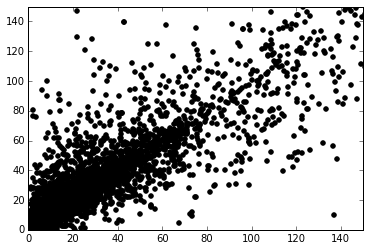

In [259]:
pred_y = cross_validation.cross_val_predict(gbr_opt,train_X,train_y,cv=10)
#pred_y = cross_validation.cross_val_predict?
plt.scatter(train_y, pred_y,  color='black')
plt.xlim((0,150))
plt.ylim ((0,150))

plt.show()

In [262]:
gbr_opt.fit(train_X,train_y)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=7, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=2400,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [263]:
gbr_opt.feature_importances_

array([ 0.03178458,  0.00950982,  0.04307509,  0.12944867,  0.09332158,
        0.02544327,  0.00731318,  0.19097495,  0.02636492,  0.04751447,
        0.02902506,  0.13096546,  0.04067198,  0.03883891,  0.0053756 ,
        0.00782471,  0.00484318,  0.00733755,  0.0176497 ,  0.02145   ,
        0.00433514,  0.00129234,  0.00281661,  0.03051995,  0.00779195,
        0.01570478,  0.01088295,  0.01427164,  0.00365198])

In [264]:
test_set = pd.read_csv(os.path.join('..','competition_data','test_set.csv'))

In [50]:
test_set.columns

Index([u'id', u'tube_assembly_id', u'supplier', u'quote_date', u'annual_usage',
       u'min_order_quantity', u'bracket_pricing', u'quantity'],
      dtype='object')

In [268]:
# Merge the tube.csv and bill of sale with train_set.csv to get the parameter
tubedf = pd.read_csv(os.path.join('..','competition_data','tube.csv'),  header=0)
compdf = pd.read_csv(os.path.join('..','competition_data','components.csv'),index_col=0, header=0)
billdf = pd.read_csv(os.path.join('..','competition_data','bill_of_materials.csv'), header=0)

print tubedf.columns

Index([u'tube_assembly_id', u'material_id', u'diameter', u'wall', u'length',
       u'num_bends', u'bend_radius', u'end_a_1x', u'end_a_2x', u'end_x_1x',
       u'end_x_2x', u'end_a', u'end_x', u'num_boss', u'num_bracket', u'other'],
      dtype='object')


In [271]:
testm1 = test_set.merge(tubedf,on='tube_assembly_id')
testm2 = testm1.merge(billdfm,on='tube_assembly_id')

In [272]:
years, months, ofsetdates = get_year_month_offset(testm2.quote_date, '2010-12-31')
testp = testm2.loc[:,[u'supplier', u'quote_date', u'annual_usage',
       u'min_order_quantity', u'bracket_pricing', u'quantity', 
       u'material_id', u'diameter', u'wall', u'length', u'num_bends',
       u'bend_radius', u'end_a_1x', u'end_a_2x', u'end_x_1x', u'end_x_2x',
       u'end_a', u'end_x', u'num_boss', u'num_bracket', u'other',
       u'component_id_name_1', u'component_type_id_1', u'quantity_1',
       u'component_id_name_2', u'component_type_id_2', u'quantity_2',
       u'component_id_name_3', u'component_type_id_3', u'quantity_3',
       'cost']]
testp = testp.drop('quote_date',axis=1)
testp.insert(1, 'year', years)
testp.insert(2, 'month', months)
testp.insert(3, 'days', ofsetdates)

In [ ]:
lbl_enc = LabelEncoder()
lbl_enc.fit(trainp.component_type_id_1.values)  
print lbl_enc.classes_
comp_id1_trans = lbl_enc.transform(trainp.component_type_id_1.values)
from collections import defaultdict
d = defaultdict(int)
for i in comp_id1_trans:
    d[i] += 1
print d

for i in range(len(comp_id1_trans)):
    if d[comp_id1_trans[i]] < TRANSFORM_CUTOFF:
        comp_id1_trans[i] = 0 

d1 = defaultdict(int)
for i in comp_id1_trans:
    d1[i] += 1

print d1
lbl1_map = {}
for i, lbl in enumerate(list(lbl_enc.classes_)):
    lbl1_map[lbl] = i

In [28]:
comp1, quant1, comp2, quant2, comp3, quant3, mat_id = [], [], [], [], [], [], []

for tubeid in test_set.tube_assembly_id.values:
    comp_id1 = billdf.loc[tubeid]['component_id_1']
    #print comp_id1
    try:
        if not isinstance(comp_id1,str):
            comp1.append(np.nan)
        else:
            #print compdf.loc[comp_id1]['name']
            comp1.append(compdf.loc[comp_id1]['name'])
    except:
        print comp_id1
    comp_id2 = billdf.loc[tubeid]['component_id_2']
    if not isinstance(comp_id2,str):
        comp2.append(np.nan)
    else:
        comp2.append(compdf.loc[comp_id2]['name'])
    comp_id3 = billdf.loc[tubeid]['component_id_3']
    if not isinstance(comp_id3,str):
        comp3.append(np.nan)
    else:
        comp3.append(compdf.loc[comp_id3]['name'])
    if not np.isnan(billdf.loc[tubeid]['quantity_1']):
        quant1.append(billdf.loc[tubeid]['quantity_1'])
    else:
        quant1.append(0)
    if not np.isnan(billdf.loc[tubeid]['quantity_2']):
        quant2.append(billdf.loc[tubeid]['quantity_2'])
    else:
        quant2.append(0)
    if not np.isnan(billdf.loc[tubeid]['quantity_3']):
        quant3.append(billdf.loc[tubeid]['quantity_3'])
    else:
        quant3.append(0)
#    quant3.append(billdf.loc[tubeid]['quantity_3'])


In [29]:
matid, dia, wall, length, n_bends, bend_rad = [], [], [], [], [], []
for tubeid in test_set.tube_assembly_id.values:
    matid.append(tubedf.loc[tubeid]['material_id'])
    dia.append(tubedf.loc[tubeid]['diameter'])
    wall.append(tubedf.loc[tubeid]['wall'])
    length.append(tubedf.loc[tubeid]['length'])
    n_bends.append(tubedf.loc[tubeid]['num_bends'])
    bend_rad.append(tubedf.loc[tubeid]['bend_radius'])

In [30]:
end_a_2x, end_x_2x, end_a, end_x = [], [], [], []
for tubeid in test_set.tube_assembly_id.values:
    end_a_2x.append(tubedf.loc[tubeid]['end_a_2x'])
    end_x_2x.append(tubedf.loc[tubeid]['end_x_2x'])
    end_a.append(tubedf.loc[tubeid]['end_a'])
    end_x.append(tubedf.loc[tubeid]['end_x'])

In [31]:
comp1x, comp2x, comp3x, quant1x, quant2x, quant3x = map(np.array, [comp1, comp2, comp3, quant1, quant2, quant3])
matidx, diax, wallx, lengthx, n_bendsx, bend_radx = map(np.array, [matid, dia, wall, length, n_bends, bend_rad])
end_a_2xx, end_x_2xx, end_ax, end_xx = map(np.array, [end_a_2x, end_x_2x, end_a, end_x])

In [33]:
testp1 = testp.loc[:,[u'year', u'month', u'days', u'annual_usage',
       u'min_order_quantity', u'quantity', 
       u'diameter', u'wall', u'length', u'num_bends',
       u'bend_radius', u'num_boss', u'num_bracket', u'other', u'cost']]
# Reencode the categorical variables
testp1.insert(0, 'supplier', splr_trans, allow_duplicates=False)
testp1.insert(6, 'bracket_pricing', brack_price_vals, allow_duplicates=False)
testp1.insert(8, 'material_id', matid_trans, allow_duplicates=False)
testp1.insert(14, 'end_a_1x', end_a_1x_vals, allow_duplicates=False)
testp1.insert(15, 'end_a_2x', end_a_2x_vals, allow_duplicates=False)
testp1.insert(16, 'end_x_1x', end_x_1x_vals, allow_duplicates=False)
testp1.insert(17, 'end_x_2x', end_x_2x_vals, allow_duplicates=False)
testp1.insert(18, 'end_a', end_a_vals, allow_duplicates=False)
testp1.insert(19, 'end_x', end_x_vals, allow_duplicates=False)
testp1.insert(23, 'component_type_id_1', comp_id1_trans, allow_duplicates=False)
testp1.insert(24, 'quantity_1', quant1, allow_duplicates=False)
testp1.insert(25, 'component_type_id_2', comp_id2_trans, allow_duplicates=False)
testp1.insert(26, 'quantity_2', quant2, allow_duplicates=False)
testp1.insert(27, 'component_type_id_3', comp_id3_trans, allow_duplicates=False)
testp1.insert(28, 'quantity_3', quant3, allow_duplicates=False)
testp1.columns

#testp = test_set.loc[:,['quantity']]
#testp.insert(1,'component_id_1_name', comp1x,allow_duplicates=False)
#testp.insert(2,'quantity_1', quant1x, allow_duplicates=False)
#testp.insert(3,'component_id_2_name', comp1x,allow_duplicates=False)
#testp.insert(4,'quantity_2', quant1x, allow_duplicates=False)
#testp.insert(5,'component_id_3_name', comp1x,allow_duplicates=False)
#testp.insert(6,'quantity_3', quant1x, allow_duplicates=False)
#testp.insert(7,'material_id',matidx,  allow_duplicates=False)
#testp.insert(8,'diameter', diax, allow_duplicates=False)
#testp.insert(9,'wall', wallx, allow_duplicates=False)
#testp.insert(10,'length', lengthx, allow_duplicates=False)
#testp.insert(11,'num_bends',n_bendsx, allow_duplicates=False)
#testp.insert(12,'bend_radius', bend_radx, allow_duplicates=False)
#testp.insert(13,'end_a_2x', end_a_2xx, allow_duplicates=False)
#testp.insert(14,'end_x_2x', end_x_2xx, allow_duplicates=False)
#testp.insert(15,'end_a', end_ax, allow_duplicates=False)
#testp.insert(16,'end_x', end_xx, allow_duplicates=False)
#testp.insert(17,'year', year, allow_duplicates=False)
#testp.insert(18,'month', month, allow_duplicates=False)
#testp.insert(19,'day',ofsetdate, allow_duplicates=False)


In [34]:
testp1 = testp.copy()
for key,value in material_id_map.items():
    testp1.material_id[testp1.material_id==key] = value
testp1.material_id[testp1.material_id.isnull()] = 4

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
testp2 = testp1.copy()
for key,value in end_map.items():
    testp2.end_a[testp2.end_a==key] = value
    testp2.end_x[testp2.end_x==key] = value
testp2.end_a[testp2.end_a.isnull()] = 4
testp2.end_x[testp2.end_x.isnull()] = 4

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [36]:
testp3 = testp2.copy()
testp3.end_x_2x[testp3.end_x_2x=='N'] = 0
testp3.end_x_2x[testp3.end_x_2x=='Y'] = 1
testp3.end_a_2x[testp3.end_a_2x=='N'] = 0
testp3.end_a_2x[testp3.end_a_2x=='Y'] = 1

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyW

In [189]:
print lbl3_map

{nan: 0, 'ELBOW-90 DEG': 17, 'HEAD FLANGED': 25, 'ELBOW-90 DEGREE': 18, 'BLOCK-HYD': 6, 'NUT-SWIVEL': 28, 'FLANGE': 21, 'CONNECTOR': 8, 'ELBOW': 14, 'ELBOW-37 (DEG)': 15, 'CONNECTOR-WELD': 13, 'BLOCK': 5, 'CONNECTOR-ORFS': 10, 'ADAPTER-O SUPPL': 3, 'HEAD-FLANGED': 26, 'ADAPTER-O LINE': 2, 'FLANGE-ONE PIEC': 23, 'TEE-FLARED': 35, 'ELBOW-HYDRAULIC': 19, 'SLEEVE-FLARED': 32, 'ADAPTER': 1, 'SLEEVE-REDUCER': 34, 'CONNECTOR-BHD': 9, 'FLANGE-ONE PC': 22, 'BOSS': 7, 'NUT-ORFS': 27, 'FITTING': 20, 'CONNECTOR-SPL': 12, 'CONNECTOR-SEAL': 11, 'PLATE': 29, 'FLANGE-ONE PIECE': 24, 'SLEEVE': 31, 'TUBE': 36, 'TUBE AS.': 37, 'SLEEVE-ORFS': 33, 'PLUG-STOR': 30, 'ELBOW-90 (DEG)': 16, 'ADAPTER-OIL LIN': 4}


In [57]:
testp4 = testp3.copy()
k1 = lbl1_map.keys()
val = testp4.component_id_1_name.values
mask = [x not in k1 for x in val] 
#for i in range(len(testp4.component_id_1_name)):
#    if testp4.component_id_1_name[i] not in lbl1_map:
#        testp4.component_id_1_name[i] = 1
testp4.component_id_1_name[mask] = 1
k2 = lbl2_map.keys()
val = testp4.component_id_2_name.values
mask = [x not in k2 for x in val] 
testp4.component_id_2_name[mask] = 1
k3 = lbl3_map.keys()
val = testp4.component_id_3_name.values
mask = [x not in k3 for x in val] 
testp4.component_id_3_name[mask] = 1

#for i in range(len(testp4.component_id_2_name)):
#    if testp4.component_id_2_name[i] not in lbl2_map:
#        testp4.component_id_2_name[i] = 1
#for i in range(len(testp4.component_id_3_name)):
#    if testp4.component_id_3_name[i] not in lbl3_map:
#        testp4.component_id_3_name[i] = 1


/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [58]:

for key,value in lbl1_map.items():
    testp4.component_id_1_name[testp4.component_id_1_name==key] = value
testp4.component_id_1_name[testp4.component_id_1_name.isnull()] = 0
for key,value in lbl2_map.items():
    testp4.component_id_2_name[testp4.component_id_2_name==key] = value
testp4.component_id_2_name[testp4.component_id_2_name.isnull()] = 0
for key,value in lbl3_map.items():
    testp4.component_id_3_name[testp4.component_id_3_name==key] = value
testp4.component_id_3_name[testp4.component_id_3_name.isnull()] = 0


/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [70]:
testp5 = testp4.copy()
k1 = d1.keys()
val = testp5.component_id_1_name.values
mask = [x not in k1 for x in val] 
testp5.component_id_1_name[mask] = 1
k2 = d2.keys()
val = testp5.component_id_2_name.values
mask = [x not in k2 for x in val] 
testp5.component_id_2_name[mask] = 1
k3 = d3.keys()
val = testp5.component_id_3_name.values
mask = [x not in k3 for x in val] 
testp5.component_id_3_name[mask] = 1

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [71]:
#testp5 = testp4.copy()
k1 = material_id_map.values()
print k1
val = testp5.material_id.values
mask = [x not in k1 for x in val] 
testp5.material_id[mask] = 4

[4, 4, 4, 1, 4, 4, 4, 4, 3, 4, 2, 0, 5]


/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
testp4.component_id_1_name.value_counts()

43    14579
41     5802
37     2038
1      1987
14     1675
42      848
30      551
48      452
49      365
9       297
11      269
34      229
21      184
31      155
22      104
47      100
28       75
16       62
13       56
10       41
29       36
38       36
39       35
24       32
23       30
32       24
45       24
7        21
25       18
2        13
18       13
51       12
44       11
4        11
15       10
35       10
12        8
46        5
20        4
17        3
8         3
40        2
36        2
33        2
3         1
dtype: int64

In [52]:
testp5.component_id_1_name.value_counts()

43    14579
41     5802
1      4108
37     2038
14     1675
42      848
30      551
49      365
11      269
dtype: int64

In [61]:
testp5.component_id_3_name.value_counts()

1     27822
11     1675
33      365
8       269
17      104
dtype: int64

In [72]:
testp5.material_id.value_counts()

0    16051
1     5728
2     2947
3     2750
5     1559
4     1200
dtype: int64

In [64]:
testp5[0:1]

,quantity,component_id_1_name,quantity_1,component_id_2_name,quantity_2,component_id_3_name,quantity_3,material_id,diameter,wall,length,num_bends,bend_radius,end_a_2x,end_x_2x,end_a,end_x,year,month,day
0,1,43,2,35,2,1,2,1,12.7,1.65,164,5,38.1,0,0,0,0,2013,6,905


In [65]:
for column in testp5.columns:
    print column
    print testp5[column].value_counts()

quantity
1       7018
5       3160
10      2992
2       2741
25      2523
50      2513
100     2348
250     2218
20      1289
6        828
3        507
4        264
15       253
8        137
12       135
30       135
9        128
40       113
7        103
19       102
24        51
16        50
35        49
75        42
60        39
70        35
55        31
80        31
18        26
36        22
        ... 
1034       1
305        1
225        1
39         1
65         1
78         1
71         1
829        1
110        1
206        1
160        1
41         1
46         1
297        1
59         1
205        1
550        1
74         1
51         1
67         1
83         1
99         1
1500       1
92         1
104        1
170        1
2500       1
155        1
165        1
44         1
dtype: int64
component_id_1_name
43    14579
41     5802
1      4108
37     2038
14     1675
42      848
30      551
49      365
11      269
dtype: int64
quantity_1
2    18629
1    10114
0     1453


In [73]:
test_X = testp5.as_matrix(testp5.columns)

In [74]:
test_y_pred = gbr_opt.predict(test_X)

In [75]:
test_y_pred


array([  62.44401327,   19.37398556,    7.29879101, ...,   10.31148402,
        239.04804792,  240.71592552])

In [80]:
test_y_pred[test_y_pred<0] = 0.1

In [81]:
test_y_pred_ser = pd.Series(data=test_y_pred,name='cost')
#pd.Series?

In [82]:
test_y_pred_ser.to_csv(os.path.join('..','competition_data','cost_predicted.csv'))